In [1]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from Hamming import *
import qiskit
%matplotlib inline

In [2]:
N = 3
circuit=HammingCircuit(N, ClassicalRegisters=True)

circuit.x(0)
circuit.x(1)
circuit.x(2)
circuit.x(3)
circuit.append(Hamming_encode(N-1), list(range(2**N)))
circuit.y(7)
circuit.append(Hamming_decode(N-1), list(range(2**N + 2*N - 1)))

circuit.measure(list(range(N)),list(range(N)))
print(circuit.draw())

         ┌───┐┌────────────┐┌────────────┐
p0000_0: ┤ H ├┤0           ├┤0           ├
         ├───┤│            ││            │
p0001_0: ┤ H ├┤1           ├┤1           ├
         ├───┤│            ││            │
p0010_0: ┤ H ├┤2           ├┤2           ├
         ├───┤│            ││            │
s0011_0: ┤ H ├┤3           ├┤3           ├
         ├───┤│            ││            │
p0100_0: ┤ H ├┤4           ├┤4           ├
         ├───┤│            ││            │
s0101_0: ┤ H ├┤5           ├┤5           ├
         ├───┤│            ││            │
s0110_0: ┤ H ├┤6           ├┤6           ├
         ├───┤│            ││            │
s0111_0: ┤ H ├┤7           ├┤7           ├
         ├───┤│            ││            │
p1000_0: ┤ H ├┤8           ├┤            ├
         ├───┤│            ││            │
s1001_0: ┤ H ├┤9           ├┤            ├
         ├───┤│   Hamming0 ││            │
s1010_0: ┤ H ├┤10          ├┤            ├
         ├───┤│            ││            │
s1011_0: ┤ 

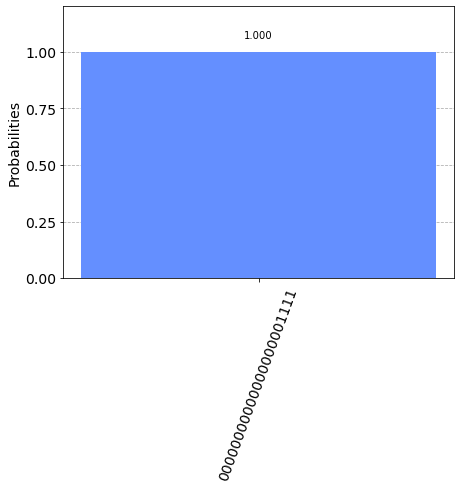

In [6]:
simulator = Aer.get_backend("qasm_simulator")
result = qiskit.execute(circuit, backend = simulator, shots=10).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))